In [96]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [97]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [98]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [99]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [100]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [101]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(5)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.000000,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.000000,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,415,GB000010,UNITED KINGDOM,University of Edinburgh,교환학생방문학생SAP(정규),교환대학SAF,7.0,7.0,5.607286,1.000000,0.801041,0.940312,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,361,SE000003,SWEDEN,Kristianstad University,교환학생,교환대학,49.0,47.0,39.341540,0.959184,0.802889,0.912295,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,49,CA000003,CANADA,Dalhousie University,교환학생,교환대학,6.0,6.0,4.088647,1.000000,0.681441,0.904432,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [102]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
AUSTRALIA              13
UNITED KINGDOM         13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
SWEDEN                  6
AUSTRIA                 6
HONG KONG               5
NEW ZEALAND             5
ITALY                   5
TAIWAN                  4
FINLAND                 4
SINGAPORE               3
RUSSIAN FEDERATION      3
SWITZERLAND             3
THAILAND                2
DENMARK                 2
NORWAY                  2
IRELAND                 2
MEXICO                  1
TURKEY                  1
ISRAEL                  1
BELGIUM                 1
POLAND                  1
LITHUANIA               1
CZECH REPUBLIC          1
Name: 국가, dtype: int64

In [103]:
df_ranking.shape

(295, 13)

In [104]:
sample_index=0

In [105]:
sample_univ = df_ranking.loc[sample_index, '대학명']
sample_univ

'University of Lausanne'

In [106]:
sample_univ = df_ranking.loc[sample_index, '국가']
sample_univ

'SWITZERLAND'

In [107]:
df_ranking.loc[(df_ranking['국가'] == 'MEXICO')]

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.6657,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [108]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'SWITZERLAND')]
print(df_ranking_sw.shape)

(3, 13)


In [109]:
df_ranking.columns.to_list()

['index',
 '대학코드',
 '국가',
 '대학명',
 '파견구분',
 '협정형태',
 'NUM_VISITS',
 'BERT_SUM',
 'RNN_SUM',
 'BERT_AVG',
 'RNN_AVG',
 'BERT_PLUS_RNN_SCORE',
 'COLLEGE_LINK']

In [110]:
df_specific.shape #specific은 왜? 제목은 abstract, specific 은 말뭉치. shape은 대학의 개수.

(470, 11)

In [111]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [112]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [113]:
df_column = df_specific.fillna("")
df_column.head()

대학코드                              대학명  \
0  AR000004         Universidad del Salvador   
1  AU000019   Australian National University   
2  AU000001                  Bond University   
3  AU000002                Curtin University   
4  AU000003  Curtin University of Technology   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [114]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [115]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [116]:
gen_data = "gen_info" #변수로 저장. 그래야 한 environment info를 제너럴로 바꿀 수 있음
univ_code = "MX000004"

In [117]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [118]:
str_example = access_univ_info(df_specific, gen_data, univ_code)
str_example[:500] #뭔가 많이 잘못됨; BERT score왜 이렇게 나온 것인지 조사 필요함- sentiment analysis 성능평가. NUM_Visits only 7.

'일단 저는 학기에 갔는데 몬테레이 지역이 미국 텍사스 국경선 바로 밑에 위치 현지인들 사이에서 날씨가 매우 안 좋다는 말이 많았어요 우중충하다기 보다는 날씨를 감 잡을 수 없다는 말이 많았는데 정말 월 초에 하루 반팔을 입어도 덥다가 다음날 패딩을 입어야만 하는 날씨의 변동이 있었습니다 하지만 그때 외로는 전반적으로 따뜻하거나 덥고 춥더라도 한국의 겨울만큼 춥지는 않습니다 학교 주변에는 산이 많아서 주말에 등산을 하는 프로그램도 많았는데 저는 한번 다녀왔습니다 비가 거의 안 오는 지역이기는 하나 한번 오면 정전이 될 정도로 왔었던 기억이 있네요 하지만 특별히 불편함이나 위험함을 느끼지는 못했습니다 대학교는 우선 굉장히 자연적 친화적입니다 조그마한 쉼터도 많고 숲풀 연못 정원 등이 곳곳에 있으며 크기는 작지만 저에게는 다니기 딱 적당했습니다 가을학기에 날씨는 정말 아 예 예상 불가이고 낮엔 도 저녁에 도 비도 많이 옵니다 더운 나라라고만 생각하시면 큰코다칩니다 저는 많이 다쳤습니다 학'

In [119]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [120]:
# collecting all column values into one string
gen_corpus = column_to_string(df_specific, gen_data)
print("글자수:", len(gen_corpus))
gen_corpus[:1000]

글자수: 4436778


'아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 건물이 대학교 건물이라서 수업에 맞는 건물로 수업을 들으러 가면 된다 도시의 대중교통이 꽤 잘 되어있기 때문에 출퇴근시간만 피한다면 편하게 다닐 수 있다 부에노스 아이레스는 여름에 도까지 올라가지만 건조한 편이어서 그늘아래 있거나 건물 안에 있으면 괜찮은 편이다 그래도 햇볓이 우리나라보다 강하므로 썬크림을 챙겨가는 것이 좋다 겨울에는 도 이하로 내려가는 날이 거의 없으나 바람이 불고 비 우박이 내릴 수 있으니 따뜻한 옷 몇 벌은 챙겨가는 것이 좋다 그리고 남반구에 있어 우리나라와 계절이 반대이다 ANU has a very big campus but unlike Yonsei everything is pretty flat aka there re no steep heels that you have to walk to get to classes The buildings are tall modern and Kambri the university main walking lane is a great spot for students gathering with lots of restaurants cafes and a lawn with bean bags for students to lie on July August in Canberra is winter so the weather is quite chilly but nice There was no snow some light rain so nobody in Canberra uses an umberella By ANU는 Civic이라는 캔버라에서 가장 중심이 되는 도심 부근에 위치하여 접근성이 좋습니다 캔버라가 시드니 멜버른에 비해 소도시라는 느낌이 강해 선호도가 낮은 듯 한데요 저 또한 퀸즐랜드가 지망이었습니다 학기를 지내며 아주 안전하고 깨끗하며 잘 만들어진 도시라는 인상을 받았습니다 행정수도라 거주하는 사람 중에 공무원이나 학교 관계자 비율이

## Tokenizing with soynlp

In [121]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [122]:
tokenized_gen = tokenizer.tokenize(gen_corpus)
tokenized_gen[:30]

['아르헨티나의',
 '대다수',
 '대학교는',
 '한국처럼',
 '캠퍼스가',
 '있는',
 '것이',
 '아니라',
 '도시',
 '내에',
 '몇개의',
 '건물이',
 '대학교',
 '건물이라서',
 '수업에',
 '맞는',
 '건물로',
 '수업을',
 '들으러',
 '가면',
 '된다',
 '도시의',
 '대중교통이',
 '꽤',
 '잘',
 '되어있기',
 '때문에',
 '출퇴근시간만',
 '피한다면',
 '편하게']

In [123]:
from collections import Counter

In [124]:
print(len(tokenized_gen)) 

1090302


In [125]:
tokenized_gen_counted = Counter(tokenized_gen)
print("no. gen words:", len(tokenized_gen_counted))
common_gen_words = tokenized_gen_counted.most_common(10)
common_gen_words

no. gen words: 110053


[('있습니다', 9641),
 ('수', 9293),
 ('있는', 7638),
 ('때문에', 6285),
 ('는', 6068),
 ('많이', 5807),
 ('매우', 4400),
 ('학교', 4182),
 ('큰', 4145),
 ('분', 4012)]

In [126]:
min(tokenized_gen_counted, key=tokenized_gen_counted.get)

'아르헨티나의'

In [127]:
### WORD2VEC

In [128]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [129]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(gen_corpus, min_count=1)

model

2020-08-26 21:45:42,827 : INFO : collecting all words and their counts
2020-08-26 21:45:42,828 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2020-08-26 21:45:42,867 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-26 21:45:42,872 : INFO : PROGRESS: at sentence #10000, processed 10000 words, keeping 546 word types
2020-08-26 21:45:42,878 : INFO : PROGRESS: at sentence #20000, processed 20000 words, keeping 657 word types
2020-08-26 21:45:42,883 : INFO : PROGRESS: at sentence #30000, processed 30000 words, keeping 720 word types
2020-08-26 21:45:42,888 : INFO : PROGRESS: at sentence #40000, processed 40000 words, keeping 757 word types
2020-08-26 21:45:42,893 : INFO : PROGRESS: at sentence #50000, processed 50000 words, keeping 785 word types
2020-08-26 21:45:42,900 : INFO : PROGRESS: at sentence #60000, processed 60000 words, keeping 807 word types
2020-08-26 21:45:

2020-08-26 21:45:43,268 : INFO : PROGRESS: at sentence #720000, processed 720000 words, keeping 1280 word types
2020-08-26 21:45:43,274 : INFO : PROGRESS: at sentence #730000, processed 730000 words, keeping 1285 word types
2020-08-26 21:45:43,280 : INFO : PROGRESS: at sentence #740000, processed 740000 words, keeping 1290 word types
2020-08-26 21:45:43,285 : INFO : PROGRESS: at sentence #750000, processed 750000 words, keeping 1291 word types
2020-08-26 21:45:43,291 : INFO : PROGRESS: at sentence #760000, processed 760000 words, keeping 1293 word types
2020-08-26 21:45:43,297 : INFO : PROGRESS: at sentence #770000, processed 770000 words, keeping 1294 word types
2020-08-26 21:45:43,302 : INFO : PROGRESS: at sentence #780000, processed 780000 words, keeping 1301 word types
2020-08-26 21:45:43,308 : INFO : PROGRESS: at sentence #790000, processed 790000 words, keeping 1304 word types
2020-08-26 21:45:43,313 : INFO : PROGRESS: at sentence #800000, processed 800000 words, keeping 1308 wor

2020-08-26 21:45:43,673 : INFO : PROGRESS: at sentence #1450000, processed 1450000 words, keeping 1441 word types
2020-08-26 21:45:43,679 : INFO : PROGRESS: at sentence #1460000, processed 1460000 words, keeping 1442 word types
2020-08-26 21:45:43,684 : INFO : PROGRESS: at sentence #1470000, processed 1470000 words, keeping 1443 word types
2020-08-26 21:45:43,689 : INFO : PROGRESS: at sentence #1480000, processed 1480000 words, keeping 1443 word types
2020-08-26 21:45:43,696 : INFO : PROGRESS: at sentence #1490000, processed 1490000 words, keeping 1446 word types
2020-08-26 21:45:43,701 : INFO : PROGRESS: at sentence #1500000, processed 1500000 words, keeping 1447 word types
2020-08-26 21:45:43,706 : INFO : PROGRESS: at sentence #1510000, processed 1510000 words, keeping 1448 word types
2020-08-26 21:45:43,712 : INFO : PROGRESS: at sentence #1520000, processed 1520000 words, keeping 1451 word types
2020-08-26 21:45:43,717 : INFO : PROGRESS: at sentence #1530000, processed 1530000 words

2020-08-26 21:45:44,071 : INFO : PROGRESS: at sentence #2170000, processed 2170000 words, keeping 1542 word types
2020-08-26 21:45:44,077 : INFO : PROGRESS: at sentence #2180000, processed 2180000 words, keeping 1542 word types
2020-08-26 21:45:44,083 : INFO : PROGRESS: at sentence #2190000, processed 2190000 words, keeping 1542 word types
2020-08-26 21:45:44,089 : INFO : PROGRESS: at sentence #2200000, processed 2200000 words, keeping 1543 word types
2020-08-26 21:45:44,095 : INFO : PROGRESS: at sentence #2210000, processed 2210000 words, keeping 1545 word types
2020-08-26 21:45:44,100 : INFO : PROGRESS: at sentence #2220000, processed 2220000 words, keeping 1545 word types
2020-08-26 21:45:44,106 : INFO : PROGRESS: at sentence #2230000, processed 2230000 words, keeping 1545 word types
2020-08-26 21:45:44,112 : INFO : PROGRESS: at sentence #2240000, processed 2240000 words, keeping 1549 word types
2020-08-26 21:45:44,118 : INFO : PROGRESS: at sentence #2250000, processed 2250000 words

2020-08-26 21:45:44,477 : INFO : PROGRESS: at sentence #2890000, processed 2890000 words, keeping 1591 word types
2020-08-26 21:45:44,484 : INFO : PROGRESS: at sentence #2900000, processed 2900000 words, keeping 1591 word types
2020-08-26 21:45:44,490 : INFO : PROGRESS: at sentence #2910000, processed 2910000 words, keeping 1592 word types
2020-08-26 21:45:44,495 : INFO : PROGRESS: at sentence #2920000, processed 2920000 words, keeping 1592 word types
2020-08-26 21:45:44,502 : INFO : PROGRESS: at sentence #2930000, processed 2930000 words, keeping 1592 word types
2020-08-26 21:45:44,507 : INFO : PROGRESS: at sentence #2940000, processed 2940000 words, keeping 1594 word types
2020-08-26 21:45:44,513 : INFO : PROGRESS: at sentence #2950000, processed 2950000 words, keeping 1594 word types
2020-08-26 21:45:44,518 : INFO : PROGRESS: at sentence #2960000, processed 2960000 words, keeping 1594 word types
2020-08-26 21:45:44,524 : INFO : PROGRESS: at sentence #2970000, processed 2970000 words

2020-08-26 21:45:44,874 : INFO : PROGRESS: at sentence #3610000, processed 3610000 words, keeping 1619 word types
2020-08-26 21:45:44,880 : INFO : PROGRESS: at sentence #3620000, processed 3620000 words, keeping 1619 word types
2020-08-26 21:45:44,885 : INFO : PROGRESS: at sentence #3630000, processed 3630000 words, keeping 1620 word types
2020-08-26 21:45:44,890 : INFO : PROGRESS: at sentence #3640000, processed 3640000 words, keeping 1620 word types
2020-08-26 21:45:44,896 : INFO : PROGRESS: at sentence #3650000, processed 3650000 words, keeping 1620 word types
2020-08-26 21:45:44,902 : INFO : PROGRESS: at sentence #3660000, processed 3660000 words, keeping 1620 word types
2020-08-26 21:45:44,907 : INFO : PROGRESS: at sentence #3670000, processed 3670000 words, keeping 1620 word types
2020-08-26 21:45:44,913 : INFO : PROGRESS: at sentence #3680000, processed 3680000 words, keeping 1621 word types
2020-08-26 21:45:44,918 : INFO : PROGRESS: at sentence #3690000, processed 3690000 words

2020-08-26 21:45:45,265 : INFO : PROGRESS: at sentence #4330000, processed 4330000 words, keeping 1642 word types
2020-08-26 21:45:45,270 : INFO : PROGRESS: at sentence #4340000, processed 4340000 words, keeping 1642 word types
2020-08-26 21:45:45,275 : INFO : PROGRESS: at sentence #4350000, processed 4350000 words, keeping 1642 word types
2020-08-26 21:45:45,280 : INFO : PROGRESS: at sentence #4360000, processed 4360000 words, keeping 1642 word types
2020-08-26 21:45:45,285 : INFO : PROGRESS: at sentence #4370000, processed 4370000 words, keeping 1644 word types
2020-08-26 21:45:45,292 : INFO : PROGRESS: at sentence #4380000, processed 4380000 words, keeping 1644 word types
2020-08-26 21:45:45,297 : INFO : PROGRESS: at sentence #4390000, processed 4390000 words, keeping 1644 word types
2020-08-26 21:45:45,303 : INFO : PROGRESS: at sentence #4400000, processed 4400000 words, keeping 1644 word types
2020-08-26 21:45:45,308 : INFO : PROGRESS: at sentence #4410000, processed 4410000 words

In [165]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', 
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', 
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [133]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()

In [156]:
kr = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_nogada.txt', encoding='utf').read()

In [157]:
stops_ = stops + kr

In [172]:
keywords = []
for n in tokenized_gen: 
    if n not in stopwords_kr: 
        keywords.append(n)

In [173]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(30)
common_key_words

[('학교', 4182),
 ('시간', 3639),
 ('캠퍼스', 3344),
 ('비가', 3087),
 ('날씨가', 3008),
 ('위치하고', 2981),
 ('위치한', 2868),
 ('위치해', 2729),
 ('크기는', 2506),
 ('Univers', 2342),
 ('기후는', 2294),
 ('날씨는', 2125),
 ('미국', 2106),
 ('캠퍼스는', 2101),
 ('약', 2004),
 ('of', 1985),
 ('타고', 1840),
 ('캠퍼스가', 1769),
 ('눈이', 1658),
 ('도시', 1593),
 ('거리에', 1531),
 ('수업을', 1512),
 ('겨울에는', 1473),
 ('건물', 1311),
 ('건물들이', 1275),
 ('차로', 1259),
 ('있기', 1243),
 ('다', 1132),
 ('않고', 1120),
 ('학교는', 1115)]

In [174]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [175]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath, colormap ='Oranges',
                        stopwords = set(stopwords_kr), 
                        background_color = backgroundcolor, 
                        max_words= 200,
                        max_font_size= 150,
                        width = width, 
                        height = height)

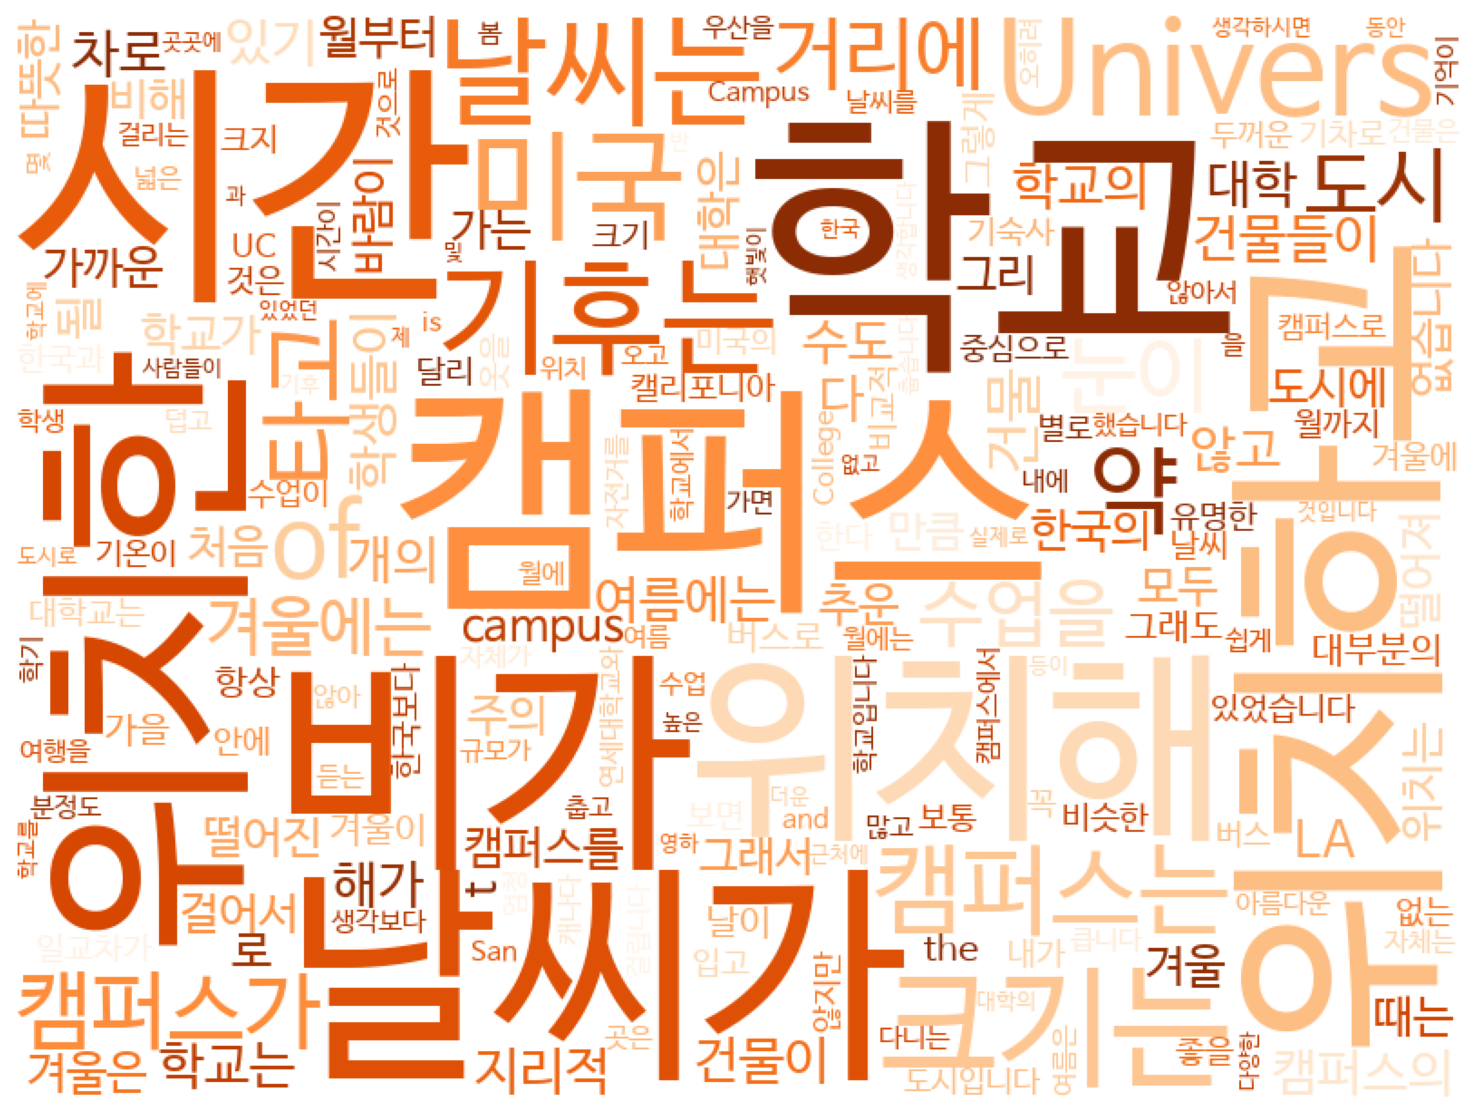

In [177]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [140]:
word_list, frequency_list = map(list, zip(*common_gen_words))
word_list[:10]

['있습니다', '수', '있는', '때문에', '는', '많이', '매우', '학교', '큰', '분']

In [141]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [142]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (32058, 17088) tokens
[Noun Extractor] building L-R graph was done000 / 766091 sents
[Noun Extractor] 5487 nouns are extracted


In [143]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns

no. gen words: 5487


[('캠퍼스',
  NounScore_v1(frequency=12581, score=0.5661491689446561, known_r_ratio=0.9409656335652541)),
 ('위치',
  NounScore_v1(frequency=9480, score=0.9677902238649745, known_r_ratio=0.8441572785509167)),
 ('겨울',
  NounScore_v1(frequency=6931, score=0.6987589767525679, known_r_ratio=0.866625019522099)),
 ('학교',
  NounScore_v1(frequency=5743, score=0.5366673626264629, known_r_ratio=0.8145096138309905)),
 ('도시',
  NounScore_v1(frequency=5460, score=0.8971600936736356, known_r_ratio=0.6836829404121032)),
 ('건물',
  NounScore_v1(frequency=4919, score=0.5452611554643406, known_r_ratio=0.6264866602378656)),
 ('여름',
  NounScore_v1(frequency=4184, score=0.7111721313559322, known_r_ratio=0.8500128633907899)),
 ('정도',
  NounScore_v1(frequency=4143, score=0.514896216282225, known_r_ratio=0.873015873015873)),
 ('버스',
  NounScore_v1(frequency=3242, score=0.8663608640159048, known_r_ratio=0.9118926758520667)),
 ('한국',
  NounScore_v1(frequency=3220, score=0.9852630802283653, known_r_ratio=0.91680440771

In [144]:
noun_extractor.lrgraph.get_r('날씨')

[('가', 3008),
 ('는', 2125),
 ('', 659),
 ('를', 620),
 ('에', 265),
 ('입니다', 257),
 ('와', 201),
 ('도', 178),
 ('로', 173),
 ('였습니다', 172)]

In [145]:
noun_extractor.lrgraph.get_l('학교')

[('연세대', 454),
 ('대', 348),
 ('우리', 120),
 ('고등', 59),
 ('주립대', 25),
 ('교환', 11),
 ('국립대', 8),
 ('홍콩대', 8),
 ('서울대', 7),
 ('사립', 6)]

In [146]:
print((nouns['환경']))

NounScore_v1(frequency=326, score=0.7002796900826446, known_r_ratio=0.8373702422145328)


In [147]:
print((nouns['학교']))

NounScore_v1(frequency=5743, score=0.5366673626264629, known_r_ratio=0.8145096138309905)


In [148]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 109345 from 766091 sents. mem=0.810 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=766090, mem=0.839 Gb
[Noun Extractor] batch prediction was completed for 31320 words
[Noun Extractor] checked compounds. discovered 9186 compounds
[Noun Extractor] postprocessing detaching_features : 19142 -> 15817
[Noun Extractor] postprocessing ignore_features : 15817 -> 15682
[Noun Extractor] postprocessing ignore_NJ : 15682 -> 15355
[Noun Extractor] 15355 nouns (9186 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.844 Gb                    
[Noun Extractor] 69.21 % eojeols are covered


In [149]:
list(noun_extractor._compounds_components.items())[:50]

[('학교배정인터뷰순서', ('학교', '배정', '인터뷰', '순서')),
 ('전문고등교육기관', ('전문', '고등교육기관')),
 ('교환학생보고서', ('교환학생', '보고서')),
 ('상해박람회개최준비', ('상해', '박람회', '개최', '준비')),
 ('경영전문사립대학교', ('경영', '전문', '사립대학교')),
 ('프랑크푸르트국제공항', ('프랑크푸르트', '국제공항')),
 ('슈투트가르트공항', ('슈투트가르트', '공항')),
 ('스투트가르트공항', ('스투트가르트', '공항')),
 ('저희학교캠퍼스', ('저희', '학교캠퍼스')),
 ('아오야마가쿠인대학교', ('아오야마가쿠인', '대학교')),
 ('우에가하라캠퍼스', ('우에가하라', '캠퍼스')),
 ('후쿠오카국제공항', ('후쿠오카', '국제공항')),
 ('후쿠오카의과대학', ('후쿠오카', '의과대학')),
 ('스즈카케다이캠퍼스', ('스즈카케다이', '캠퍼스')),
 ('코마바토다이마에역', ('코마바', '토다이마에역')),
 ('유로라인버스정류장', ('유로라인', '버스정류장')),
 ('메인게스트하우스', ('메인', '게스트하우스')),
 ('맨체스터유나이티드', ('맨체스터', '유나이티드')),
 ('위치상트페테르부르크', ('위치', '상트페테르부르크')),
 ('경험보고서연세대학교', ('경험보고서', '연세대학교')),
 ('영국공립종합대학', ('영국', '공립', '종합대학')),
 ('종합대학교스코틀랜드', ('종합대학교', '스코틀랜드')),
 ('빨간색지하철라인', ('빨간색', '지하철', '라인')),
 ('북부버지니아지방', ('북부', '버지니아', '지방')),
 ('포틀랜드국제공항', ('포틀랜드', '국제공항')),
 ('샌프란시스코주립대학', ('샌프란시스코', '주립대학')),
 ('샌프란시스코국제공항', ('샌프란시스코', '국제공항')),
 ('미니애폴리스공항', ('미니애폴리스', '공항')),
 ('샌프란

In [150]:
print((nouns['마약'])) #LR중요도였는데, counter library가서 순서 매겨야 함
#list 말고 숫자로밖에 순서도 ㄴ
#큐플, 숫자말고 레이블링. 
#tuple 
#generate wordcloud konlpy 

NounScore_v1(frequency=5, score=0.8016826, known_r_ratio=1.0)


In [151]:
%time df_tokens = df_column.apply(tokenizer.tokenize)

AttributeError: 'Series' object has no attribute 'split'